In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action="ignore")

In [4]:
df = pd.read_csv("result_new.csv")
df.head()

,Unnamed: 0,sku,orgprice,discount,dept,classid,upc,style,color,size,packsize,vendor,brand,unknown
0,0,3,440.00,0.00,6505,113 ...,400000003000,00 F55KT2 ...,WHISPERWHITE ...,P8EA ...,1,5119207,TURNBURY ...,0
1,1,69,12.25,0.00,7106,915 ...,400000069000,WINDY ...,RED CALF ...,070M ...,1,4816434,ME TOO ...,1
2,2,73,12.00,0.75,6107,001 ...,400000073000,3 F11G28 ...,WHITE ...,HAND ...,6,2017178,NOBILITY ...,0
3,3,78,59.04,0.17,5301,001 ...,400000078000,70091L440400 ...,BROWN ...,10 ...,1,9912767,M.M. & R ...,0
4,4,91,68.00,0.75,9801,004 ...,400000091000,H31246 ...,CORAL ...,S ...,1,9212766,GABAR IN ...,0


## Data cleaning

### Drop columns that are irrelavant

In [5]:
df = df.drop(columns = ['Unnamed: 0', 'style', 'size', 'unknown'])
df.head()

,sku,orgprice,discount,dept,classid,upc,color,packsize,vendor,brand
0,3,440.00,0.00,6505,113 ...,400000003000,WHISPERWHITE ...,1,5119207,TURNBURY ...
1,69,12.25,0.00,7106,915 ...,400000069000,RED CALF ...,1,4816434,ME TOO ...
2,73,12.00,0.75,6107,001 ...,400000073000,WHITE ...,6,2017178,NOBILITY ...
3,78,59.04,0.17,5301,001 ...,400000078000,BROWN ...,1,9912767,M.M. & R ...
4,91,68.00,0.75,9801,004 ...,400000091000,CORAL ...,1,9212766,GABAR IN ...


### Clean color: transform colors into different color groups

In [29]:
df['color'].value_counts().head(30)

BLACK                                                                                                                               35799
WHITE                                                                                                                               17482
NAVY                                                                                                                                10906
MULTI                                                                                                                                8703
RED                                                                                                                                  8616
PINK                                                                                                                                 8545
BLUE                                                                                                                                 7504
GREY                              

In [6]:
# create a new column color group
df['color'] = df['color'].replace(r"^ +| +$", r"", regex=True)
df['color group'] = df['color']
df.head()

,sku,orgprice,discount,dept,classid,upc,color,packsize,vendor,brand,color group
0,3,440.00,0.00,6505,113 ...,400000003000,WHISPERWHITE,1,5119207,TURNBURY ...,WHISPERWHITE
1,69,12.25,0.00,7106,915 ...,400000069000,RED CALF,1,4816434,ME TOO ...,RED CALF
2,73,12.00,0.75,6107,001 ...,400000073000,WHITE,6,2017178,NOBILITY ...,WHITE
3,78,59.04,0.17,5301,001 ...,400000078000,BROWN,1,9912767,M.M. & R ...,BROWN
4,91,68.00,0.75,9801,004 ...,400000091000,CORAL,1,9212766,GABAR IN ...,CORAL


In [7]:
color_lst = [['WHITE', 'SILVER', 'BONE', 'IVORY', "WHT", "CREAM", "WH"],
             ['BLACK', 'BLK','ONYX',"OBSIDIAN","BLA", 'MIDNIGHT'],
             ['GREEN', 'OLIVE', 'AQUA', 'TURQUOISE', 'LIME', 'TURQ', "SAGE","TEAL"],
             ['NATURAL','TAUPE', 'KHAKI', "CAMEL", "SAND", "STONE", "BEIGE", "KH"],
             ['PURPLE', 'LILAC', 'PLUM', 'LAVENDER'],
             ['RED', 'BURGUNDY', 'WINE', 'CARDINAL'],
             ['BLUE', 'NAVY', 'INDIGO', 'DENIM'], 
             ['MULTI', 'ASSORTED', "ASST", "ROYAL"], 
             ['PINK', 'ROSE', 'FUCHSIA', "FUSCHIA"],
             ['BROWN','CHOCOLATE', 'TAN'], 
             ['GREY', 'CHARCOAL'], 
             ['YELLOW','GOLD'], 
             ['ORANGE',"CORAL"],
             ["UNDEFINED", "CLARIFY",'NO COLOR']]

In [8]:
for colors in color_lst:
    df.loc[df["color"].str.contains("|".join(colors))==True, "color group"] = colors[0]

df.loc[df["color"] == "N/A","color group"] = "UNDEFINED"
df.loc[df["color"] == "NA","color group"] = "UNDEFINED"

df.loc[df["color"].str.contains("|".join([colors[0] for colors in color_lst]))==False, "color group"] = "OTHERS"

In [9]:
df.head()

,sku,orgprice,discount,dept,classid,upc,color,packsize,vendor,brand,color group
0,3,440.00,0.00,6505,113 ...,400000003000,WHISPERWHITE,1,5119207,TURNBURY ...,WHITE
1,69,12.25,0.00,7106,915 ...,400000069000,RED CALF,1,4816434,ME TOO ...,RED
2,73,12.00,0.75,6107,001 ...,400000073000,WHITE,6,2017178,NOBILITY ...,WHITE
3,78,59.04,0.17,5301,001 ...,400000078000,BROWN,1,9912767,M.M. & R ...,BROWN
4,91,68.00,0.75,9801,004 ...,400000091000,CORAL,1,9212766,GABAR IN ...,OTHERS


### Clean brand: transform brands into different levels

In [10]:
df_levels = df.groupby('brand').agg({'orgprice': 'mean'}).reset_index().sort_values(by='orgprice')
df_levels['level'] = pd.qcut(df_levels['orgprice'], 5, labels = False)+1
df = df.join(df_levels.set_index('brand')[['level']], on='brand')
df.head()

,sku,orgprice,discount,dept,classid,upc,color,packsize,vendor,brand,color group,level
0,3,440.00,0.00,6505,113 ...,400000003000,WHISPERWHITE,1,5119207,TURNBURY ...,WHITE,5.0
1,69,12.25,0.00,7106,915 ...,400000069000,RED CALF,1,4816434,ME TOO ...,RED,4.0
2,73,12.00,0.75,6107,001 ...,400000073000,WHITE,6,2017178,NOBILITY ...,WHITE,4.0
3,78,59.04,0.17,5301,001 ...,400000078000,BROWN,1,9912767,M.M. & R ...,BROWN,4.0
4,91,68.00,0.75,9801,004 ...,400000091000,CORAL,1,9212766,GABAR IN ...,OTHERS,5.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521649 entries, 0 to 521648
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sku          521649 non-null  int64  
 1   orgprice     521649 non-null  float64
 2   discount     521649 non-null  float64
 3   dept         521649 non-null  int64  
 4   classid      521649 non-null  object 
 5   upc          521649 non-null  int64  
 6   color        521649 non-null  object 
 7   packsize     521649 non-null  int64  
 8   vendor       521649 non-null  int64  
 9   brand        519060 non-null  object 
 10  color group  521649 non-null  object 
 11  level        519060 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 47.8+ MB


In [48]:
df.isna().sum()

sku               0
orgprice          0
discount          0
dept              0
classid           0
upc               0
color             0
packsize          0
vendor            0
brand          2589
color group       0
level          2589
dtype: int64

In [12]:
# drop nan brands
df = df.dropna().reset_index(drop=True)
df.head()

,sku,orgprice,discount,dept,classid,upc,color,packsize,vendor,brand,color group,level
0,3,440.00,0.00,6505,113 ...,400000003000,WHISPERWHITE,1,5119207,TURNBURY ...,WHITE,5.0
1,69,12.25,0.00,7106,915 ...,400000069000,RED CALF,1,4816434,ME TOO ...,RED,4.0
2,73,12.00,0.75,6107,001 ...,400000073000,WHITE,6,2017178,NOBILITY ...,WHITE,4.0
3,78,59.04,0.17,5301,001 ...,400000078000,BROWN,1,9912767,M.M. & R ...,BROWN,4.0
4,91,68.00,0.75,9801,004 ...,400000091000,CORAL,1,9212766,GABAR IN ...,OTHERS,5.0


## Data Visualization

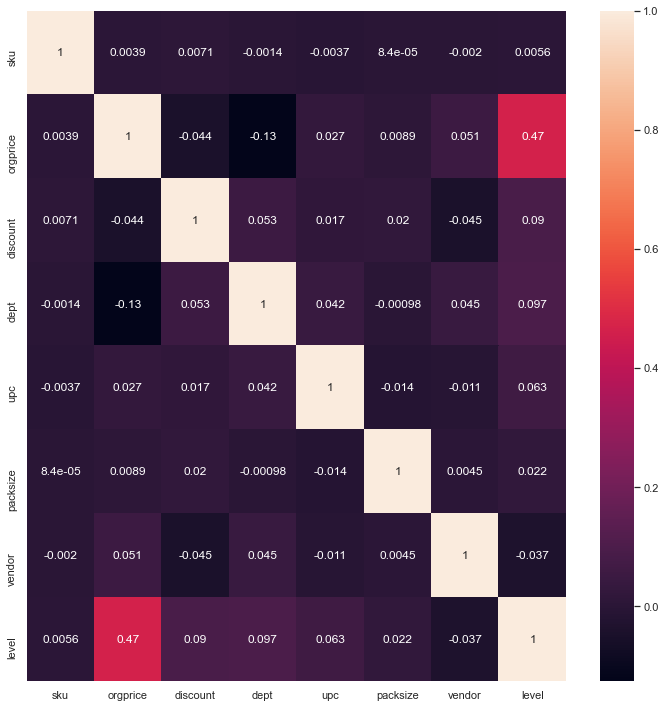

In [54]:
cmap = sns.set(style = "darkgrid") 

f,ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df.corr(), cmap=cmap, annot=True)

f.tight_layout()

## Feature Engineer

In [13]:
# Pick features that avoid data leackage
features = ['dept',
            'classid',
            'color group',
            'vendor',
            'level']

In [14]:
# Name a new variable X as the dataset of features selected for logistic models
X = df[features]
X

,dept,classid,color group,vendor,level
0,6505,113 ...,WHITE,5119207,5.0
1,7106,915 ...,RED,4816434,4.0
2,6107,001 ...,WHITE,2017178,4.0
3,5301,001 ...,BROWN,9912767,4.0
4,9801,004 ...,OTHERS,9212766,5.0
...,...,...,...,...,...
519055,3404,00A ...,MULTI,6813321,2.0
519056,4402,303 ...,OTHERS,3113687,4.0
519057,9801,726 ...,MULTI,9212766,5.0
519058,1202,402 ...,OTHERS,1446212,1.0


In [16]:
# Use LabelEncoder to apply OneHot Encoding to non-numerical values from X
label_encoder = LabelEncoder()
ord_encoder = OrdinalEncoder()

X['dept'] = label_encoder.fit_transform(X['dept'])
X['classid'] = label_encoder.fit_transform(X['classid'])
#X['color group'] = label_encoder.fit_transform(X['color group'])
X['vendor'] = label_encoder.fit_transform(X['vendor'])
X['level'] = ord_encoder.fit_transform(X[['level']])

# Display the Encoded X
X

,dept,classid,color group,vendor,level
0,41,46,WHITE,940,4.0
1,46,679,RED,872,3.0
2,37,0,WHITE,440,3.0
3,32,0,BROWN,1733,3.0
4,59,3,OTHERS,1650,4.0
...,...,...,...,...,...
519055,19,9,MULTI,1250,1.0
519056,23,218,OTHERS,607,3.0
519057,59,550,MULTI,1650,4.0
519058,4,295,OTHERS,330,0.0


In [17]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'color group' column 
encoder_df = pd.DataFrame(encoder.fit_transform(X[['color group']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_X = X.join(encoder_df)
final_X#.drop('team', axis=1, inplace=True)

,dept,classid,color group,vendor,level,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,41,46,WHITE,940,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,46,679,RED,872,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,0,WHITE,440,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,32,0,BROWN,1733,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59,3,OTHERS,1650,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519055,19,9,MULTI,1250,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
519056,23,218,OTHERS,607,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
519057,59,550,MULTI,1650,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
519058,4,295,OTHERS,330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# Declare the dependent and independent variables for classification models
x = final_X.values
y = df.discount.values

## Data Modeling

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
# Split the dataframe into training and testing sets using downsampled data
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size = 0.8, 
                                                    random_state = 999)

### Linear Regression

In [65]:
# Create an instance of the model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg = lin_reg.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = lin_reg.predict(X_test)

In [66]:
# Calculate the RMSE number for this model
test_set_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#Calculate the R-square score for this model
test_set_r2 = r2_score(y_test, y_pred)

print("The RMSE is", '{:.4}'.format(test_set_rmse))
print("The R-square score is", '{:.4%}'.format(test_set_r2))

The RMSE is 0.2904
The R-square score is 1.1362%


### Random Forest

In [68]:
rf_reg = RandomForestRegressor()
rf_reg = rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

In [69]:
# Calculate the RMSE number for this model
test_set_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#Calculate the R-square score for this model
test_set_r2 = r2_score(y_test, y_pred)

print("The RMSE is", '{:.4}'.format(test_set_rmse))
print("The R-square score is", '{:.4%}'.format(test_set_r2))

The RMSE is 0.2115
The R-square score is 47.5265%


### KNN

In [71]:
knn_reg = KNeighborsRegressor()
knn_reg = knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

In [72]:
# Calculate the RMSE number for this model
test_set_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#Calculate the R-square score for this model
test_set_r2 = r2_score(y_test, y_pred)

print("The RMSE is", '{:.4}'.format(test_set_rmse))
print("The R-square score is", '{:.4%}'.format(test_set_r2))

The RMSE is 0.23
The R-square score is 37.9500%
